In [19]:
import pandas as pd
import numpy as np
import random
import pyttsx3
import ipywidgets as widgets
import csv
import numpy as np
import math as math
import statistics
from random import randrange

In [20]:
randrange(10)

1

In [21]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = randrange(10)*10
        y = int(10*np.random.normal(rho * x, math.sqrt(rho+rho**3), 1))/10
        z = (0.1*x + 0.1*y)/10
        mat[i, ] = [x,y,z]
    return(mat)

In [22]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = np.random.normal(rho * y, math.sqrt(rho+rho**3), 1)
        y = np.random.normal(rho * x, math.sqrt(rho+rho**3), 1)
        z = np.random.normal(rho * x + rho * y, math.sqrt(rho+rho**3), 1)/100
        mat[i, ] = [x,y,z]
    return(mat)

In [23]:
save = pd.DataFrame(collapsedgibbs3NormV(100,0.99,50,45,1))

In [24]:
save[2]

0     1.000000
1     0.943345
2     0.909539
3     0.850643
4     0.826970
        ...   
95   -0.009266
96    0.011950
97   -0.085839
98   -0.139477
99   -0.190678
Name: 2, Length: 100, dtype: float64

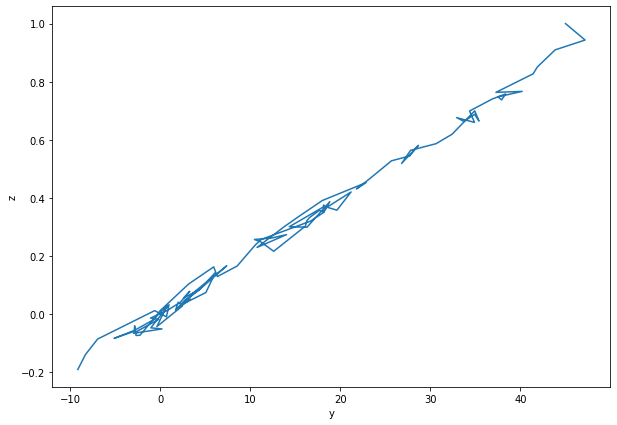

In [25]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("y")
plt.ylabel("z")
plt.plot(save[1],save[2])
plt.savefig('yz.png')

In [26]:
save = open("lyricsdata.csv")

In [27]:
csvreader = csv.reader(save)

In [28]:
header = []
header = next(csvreader)

In [29]:
df = pd.DataFrame(index=np.arange(8031), columns=np.arange(1))

In [30]:
rows = []
for row in csvreader:
        rows.append(row)

In [31]:
engine = pyttsx3.init()

In [32]:
rate = engine.getProperty("rate")

In [33]:
voices = engine.getProperty("voices")
# bpm and subdivide bpm. in each line the bpm can differ across time.

In [34]:
#engine = pyttsx3.init()
#engine.say('The quick brown fox jumped over the lazy dog.', 'fox')
#engine.runAndWait();
#engine.startLoop(False)
# engine.iterate() must be called inside externalLoop()
#def externalLoop():
#    for i in range(1, 3):
#            engine = pyttsx3.init()
#            rows[i][0] = rows[i][0][1:]
#            str1 = ''.join(rows[i])  
#externalLoop()
#engine.endLoop()

In [35]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, rho = 0.99, x = 50, y = 45, z = 0):
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[y].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = collapsedgibbs3NormV(numberOfLines, rho, x, y, z)
        print(sample)
        for i in range(startingPoint, startingPoint + len(sample)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            if(abs(sample[i-startingPoint,0]) >= 20 and abs(sample[i-startingPoint,0]) <= 1000 and abs(sample[i-startingPoint,0]) != 0):
                engine.setProperty("rate", abs(sample[i-startingPoint,0]))
            else:
                engine.setProperty("rate", 50)
            engine.setProperty("voice", voices[7].id)
            if(abs(sample[i-startingPoint,2]) <= 1):
                engine.setProperty("volume", sample[i-startingPoint,2])

            else:
                engine.setProperty("volume", 0.5)
            engine.say(str1)
            engine.runAndWait(); 
            engine.stop()

In [36]:
widgets.interact(text_to_speech, numberOfLines = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                 startingPoint = (1,8020,1), rho =(-0.99,0.99,0.01), x= (-900, 900, 10), y = (-47,47,1), z = (-1,1,0.1));





interactive(children=(Dropdown(description='numberOfLines', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…

In [87]:
# if needed:
engine.endLoop()

In [32]:
# pip install pyaudio
# below is improv based on my own voice

In [14]:
import re
import wave
import pyaudio
import _thread
import time

class TextToSpeech:
    
    CHUNK = 1024
    def __init__(self, words_pron_dict:str = 'cmudict-0.7b.txt'):
        self._l = {}
        self._load_words(words_pron_dict)

    def _load_words(self, words_pron_dict:str):
        with open(words_pron_dict, 'r') as file:
            for line in file:
                 if not line.startswith(';;;'):
                        key, val = line.split('  ',2)
                        self._l[key] = re.findall(r"[A-Z]+",val)

    def get_pronunciation(self, str_input):
        list_pron = []
        for word in re.findall(r"[\w']+",str_input.upper()):
            if word in self._l:
                list_pron += self._l[word]
        print(list_pron)
        delay=0
        for pron in list_pron:
            _thread.start_new_thread( TextToSpeech._play_audio, (pron,delay,))
            delay += 0.31

    def _play_audio(sound, delay):
        try:
            time.sleep(delay)
            wf = wave.open("sounds/"+sound+".wav", "rb")
            p = pyaudio.PyAudio()
            stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                            channels=wf.getnchannels(),
                            rate=wf.getframerate(),
                            output=True)

            data = wf.readframes(TextToSpeech.CHUNK)

            while data:
                stream.write(data)
                data = wf.readframes(TextToSpeech.CHUNK)

            stream.stop_stream()
            stream.close()

            p.terminate()
            return
        except:
            pass
    

if __name__ == '__main__':
    tts = TextToSpeech()
    while True:
        tts.get_pronunciation(input('Enter a word or phrase: '))

Enter a word or phrase: I seen grown men cry
['AY', 'S', 'IY', 'N', 'G', 'R', 'OW', 'N', 'M', 'EH', 'N', 'K', 'R', 'AY']
Enter a word or phrase: grown men die
['G', 'R', 'OW', 'N', 'M', 'EH', 'N', 'D', 'AY']
Enter a word or phrase: for the love of that money
['F', 'AO', 'R', 'DH', 'AH', 'L', 'AH', 'V', 'AH', 'V', 'DH', 'AE', 'T', 'M', 'AH', 'N', 'IY']
Enter a word or phrase: trigga finga itchin
[]
Enter a word or phrase: trigger finger itching
['T', 'R', 'IH', 'G', 'ER', 'F', 'IH', 'NG', 'G', 'ER', 'IH', 'CH', 'IH', 'NG']
Enter a word or phrase: palms sweating too
['P', 'AA', 'M', 'Z', 'S', 'W', 'EH', 'T', 'IH', 'NG', 'T', 'UW']
Enter a word or phrase: playing peek a booo
['P', 'L', 'EY', 'IH', 'NG', 'P', 'IY', 'K', 'AH']
Enter a word or phrase: boo
['B', 'UW']
Enter a word or phrase: this is true
['DH', 'IH', 'S', 'IH', 'Z', 'T', 'R', 'UW']


KeyboardInterrupt: Interrupted by user